## EDA on Spotify (data sourced from the spotify web API)
First step is to add all the library imports that will be used (will add more as we progress with the exploration)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


### Loading Data
In this step, we load the data from the csv to our dataframe

In [34]:
file_path ='data/spotify_top_songs_audio_features.csv'
df = pd.read_csv(file_path)
df

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


## Exploratory Data Analysis
First let's check if we have any null values

In [35]:
df.isnull().sum()

id                  0
artist_names        0
track_name          0
source              0
key                 0
mode                0
time_signature      0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
duration_ms         0
weeks_on_chart      0
streams             0
dtype: int64

Now to check for duplicate values

In [7]:
df.duplicated().sum()

0

In our dataframe, we can see the unique id for every track, since we don't need that for our analysis we can drop that column

In [10]:
# df = df.drop('id', axis=1)
df

,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


### Plotting the distribution of data across all columns 

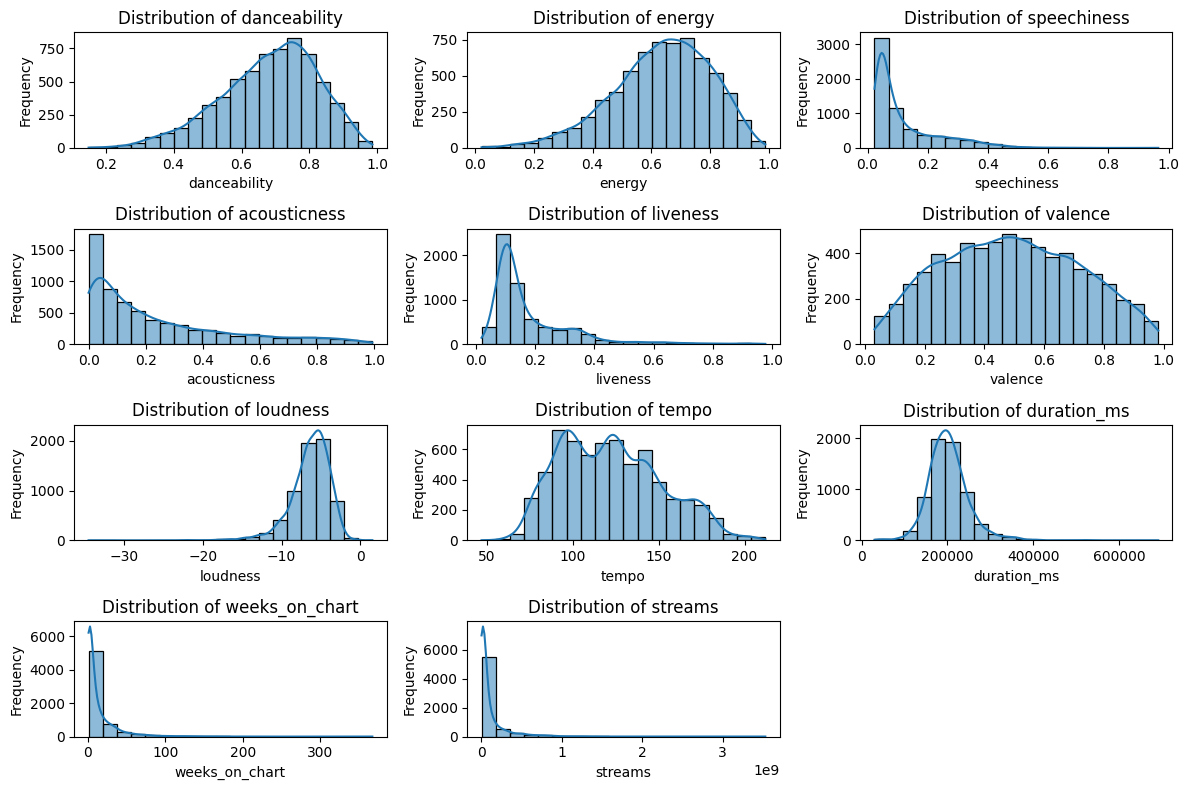

In [11]:
#Setting up the figure and its axes
plt.figure(figsize=(12,8))

#List of numeric features

numeric_features = ['danceability','energy','speechiness','acousticness', 
                    'liveness', 'valence', 'loudness', 'tempo', 
                    'duration_ms', 'weeks_on_chart', 'streams']

for i, feature in enumerate(numeric_features,1):
    plt.subplot(4,3,i)
    sns.histplot(df[feature],bins=20,kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Observational points here are:
- The graphs show the distribution of various audio features of the songs, including danceability, energy, speechiness, acousticness, liveness, valence, loudness, tempo, and duration. For instance, the distribution of danceability shows that a higher proportion of songs have a low danceability score, indicating they are likely slower and less energetic.

- The spread of the data across most features suggests there is a variety of musical styles represented in the dataset. For example, the distribution of acousticness shows some songs have a high acousticness score, meaning they are likely instrumental or acoustic, while others have a low score, indicating they are more electronic or heavily produced.

#### Finding the top artists on the platform based on streams

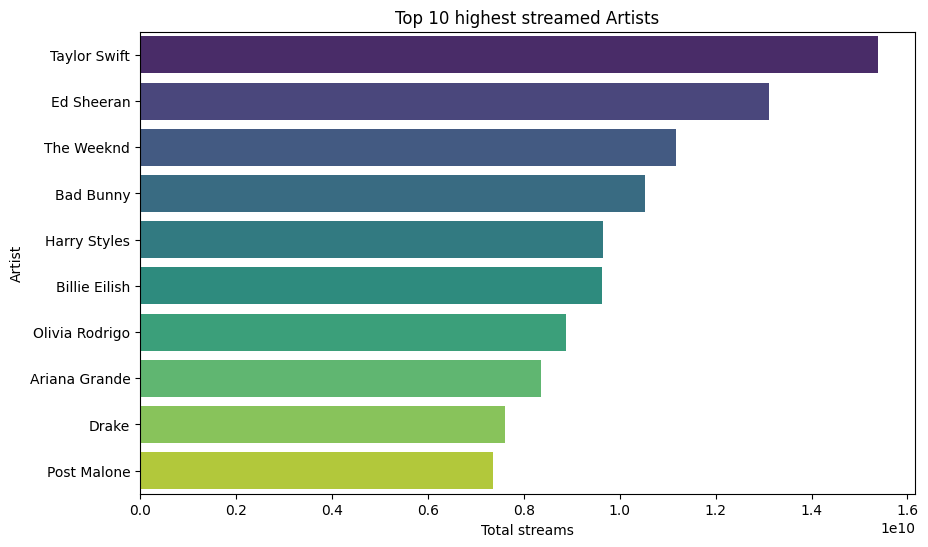

In [14]:
# Aggregate the data by artist names and sum up the streams
top_artists = df.groupby('artist_names')['streams'].sum().nlargest(10)

#Plotting  them using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values,y=top_artists.index, palette='viridis', hue=top_artists.index, legend=False)
plt.xlabel('Total streams')
plt.ylabel('Artist')
plt.title('Top 10 highest streamed Artists')
plt.show()

This plot seems fine but as we can see the scale of number of streams is given in scientific notation lets try to express that in billions which seems appropriate

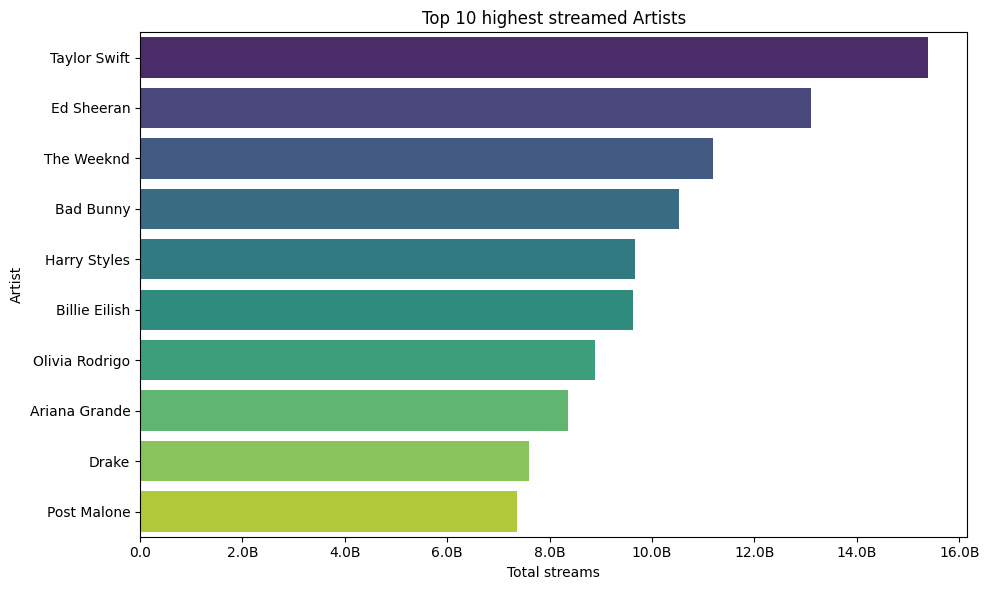

In [23]:
plt.figure(figsize=(10, 6))

# Creating a formatter helper method to format tick labels as millions or billions
def billions_formatter(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x>=1e6:
        return f'{x/1e6:.1f}M'
    else:
        return x

# Set the formatter function for x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))

# Plot the bar plot with 'hue' and 'legend' parameters
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, legend=False, palette='viridis')

plt.xlabel('Total streams')
plt.ylabel('Artist')
plt.title('Top 10 highest streamed Artists')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### Finding the top streamed tracks on Spotify

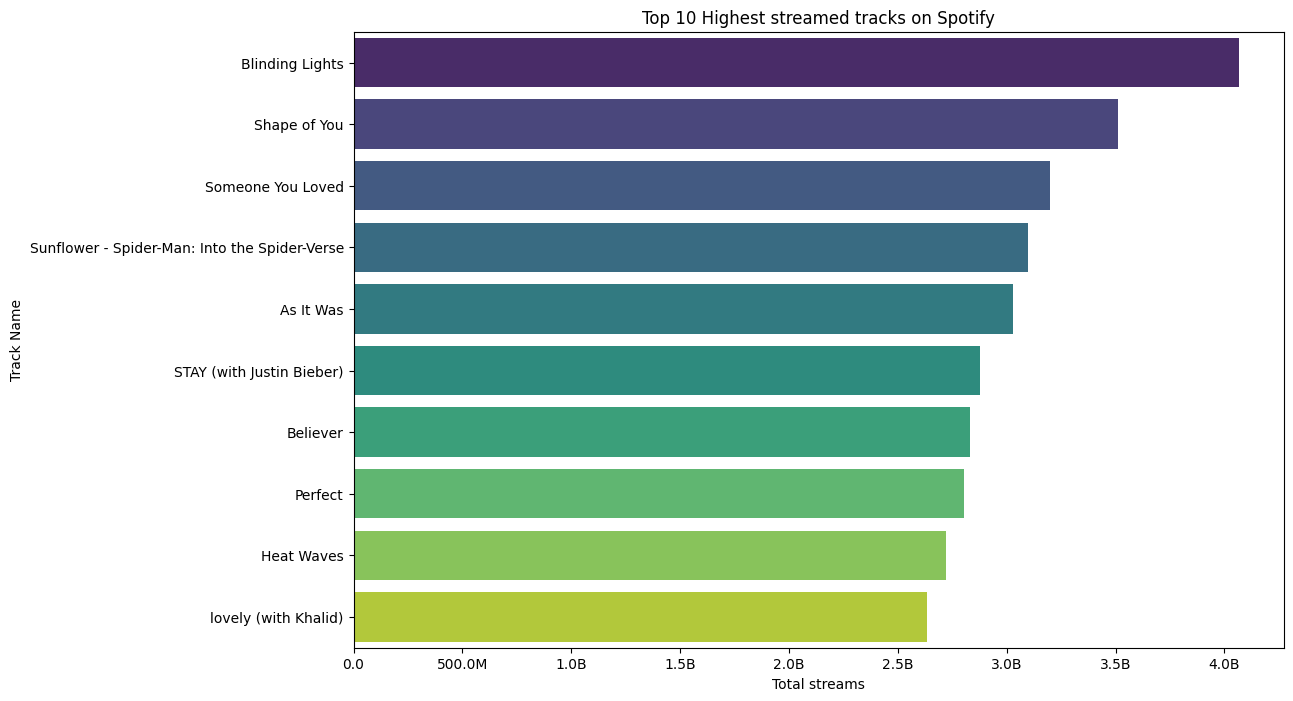

In [24]:
top_tracks = df.groupby('track_name')['streams'].sum().nlargest(10)

#Plotting
plt.figure(figsize=(12,8))
#using the formatter method created earlier
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='viridis', hue=top_tracks.index, legend=False)
plt.xlabel('Total streams')
plt.ylabel('Track Name')
plt.title('Top 10 Highest streamed tracks on Spotify')
plt.show()

Now, let's find the artists that were on the charts for the most amount of time (weeks)

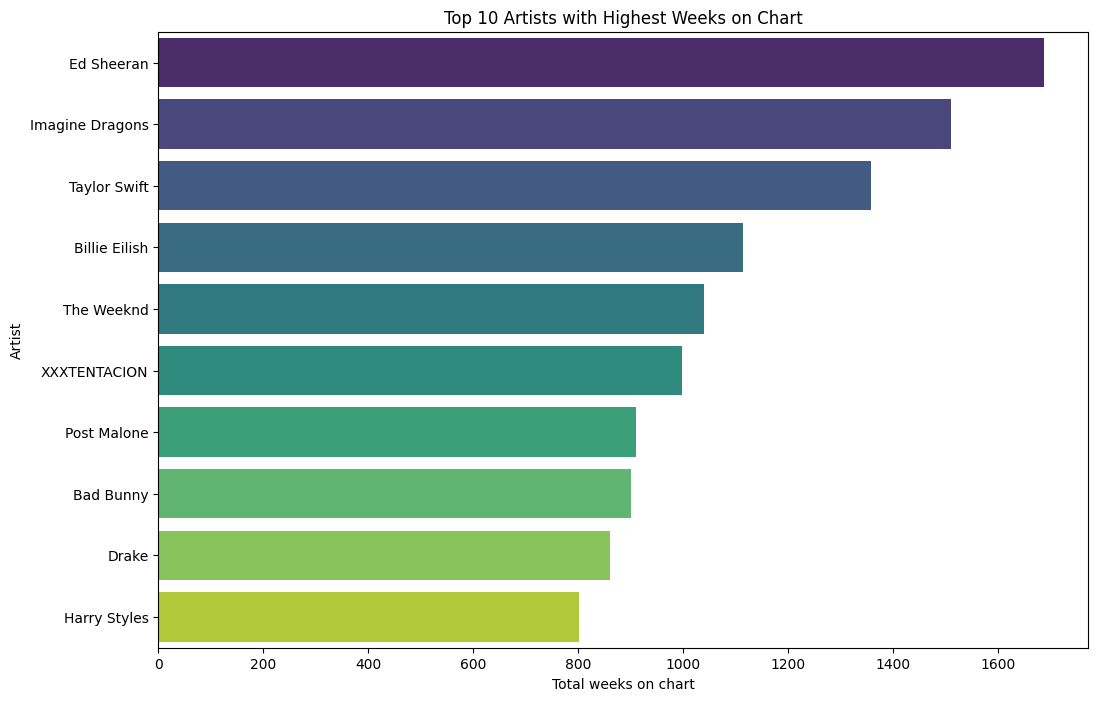

In [25]:
# aggregating data by artist names and sum up the weeks on chart
top_artists_weeks = df.groupby('artist_names')['weeks_on_chart'].sum().nlargest(10)

#Plotting
plt.figure(figsize=(12,8))
sns.barplot(
    x=top_artists_weeks.values, 
    y=top_artists_weeks.index,
    palette='viridis',
    hue=top_artists_weeks.index,
    legend=False
    )
plt.xlabel('Total weeks on chart')
plt.ylabel('Artist')
plt.title('Top 10 Artists with Highest Weeks on Chart')
plt.show()

### Feature correlation with amount of Streams
Let's try to see how the features given in our dataset affect stream numbers

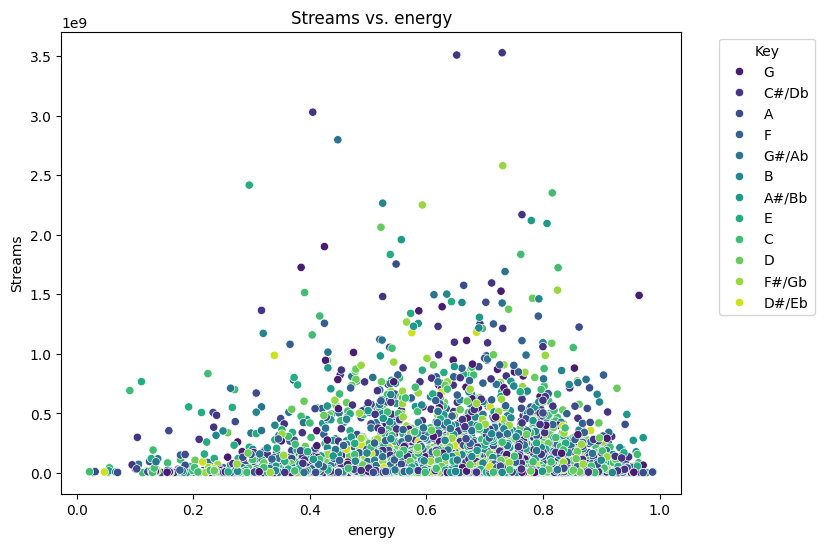

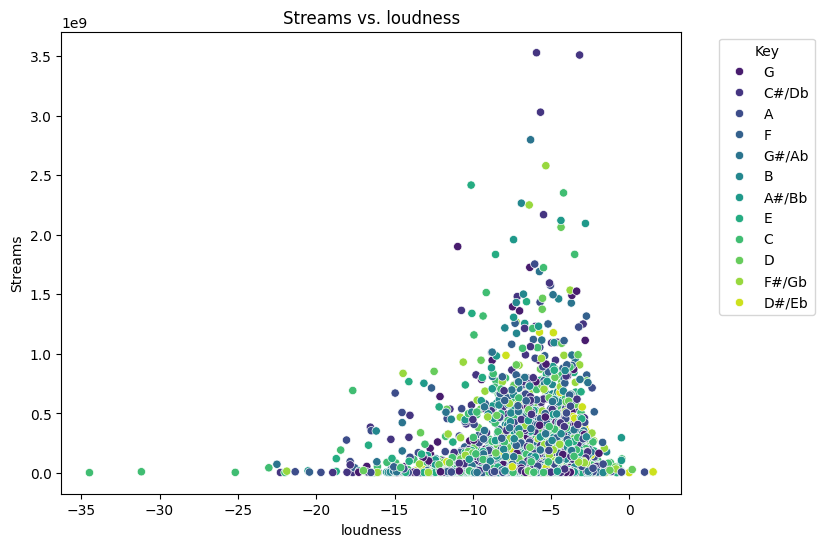

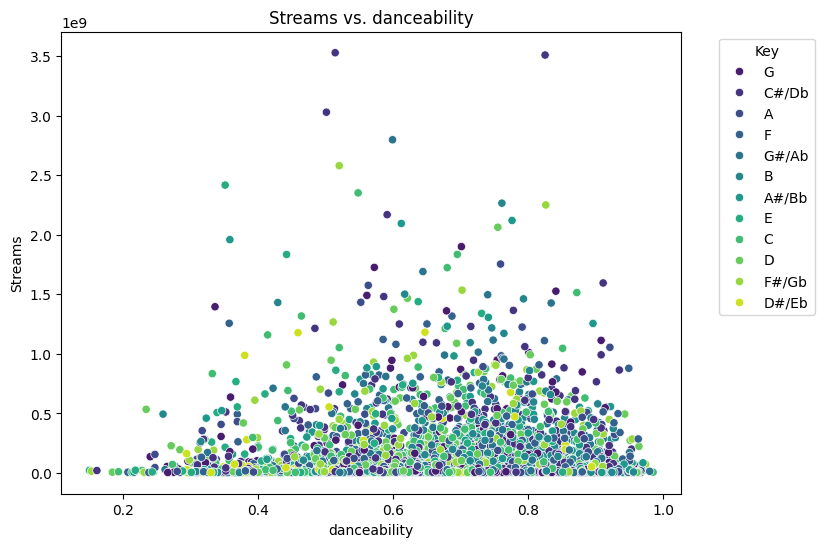

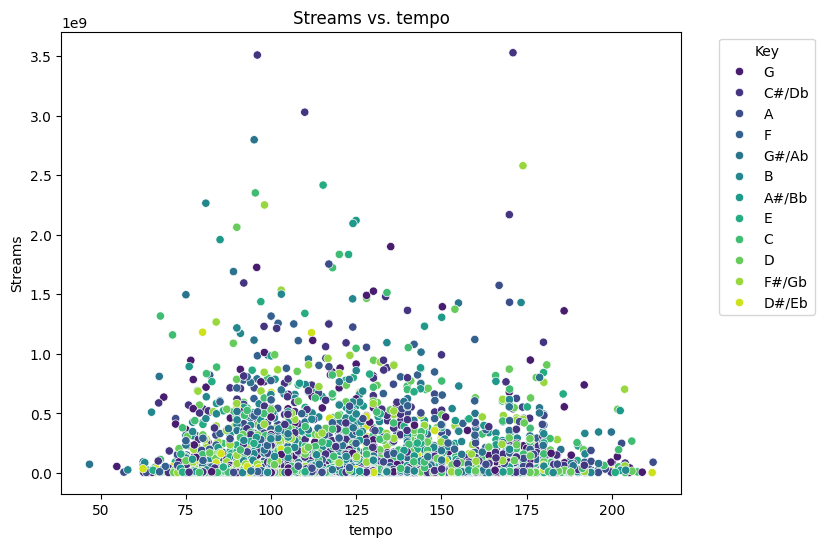

In [26]:
numeric_features = ['energy', 'loudness', 'danceability', 'tempo']
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='streams', hue='key', palette='viridis')
    plt.title(f'Streams vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Streams')
    plt.legend(title='Key', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Plotting correlational heatmap
First we will have to encode categorical data

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype== 'object': #to check if column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_names      6513 non-null   int32  
 1   track_name        6513 non-null   int32  
 2   source            6513 non-null   int32  
 3   key               6513 non-null   int32  
 4   mode              6513 non-null   int32  
 5   time_signature    6513 non-null   int32  
 6   danceability      6513 non-null   float64
 7   energy            6513 non-null   float64
 8   speechiness       6513 non-null   float64
 9   acousticness      6513 non-null   float64
 10  instrumentalness  6513 non-null   float64
 11  liveness          6513 non-null   float64
 12  valence           6513 non-null   float64
 13  loudness          6513 non-null   float64
 14  tempo             6513 non-null   float64
 15  duration_ms       6513 non-null   int64  
 16  weeks_on_chart    6513 non-null   int64  


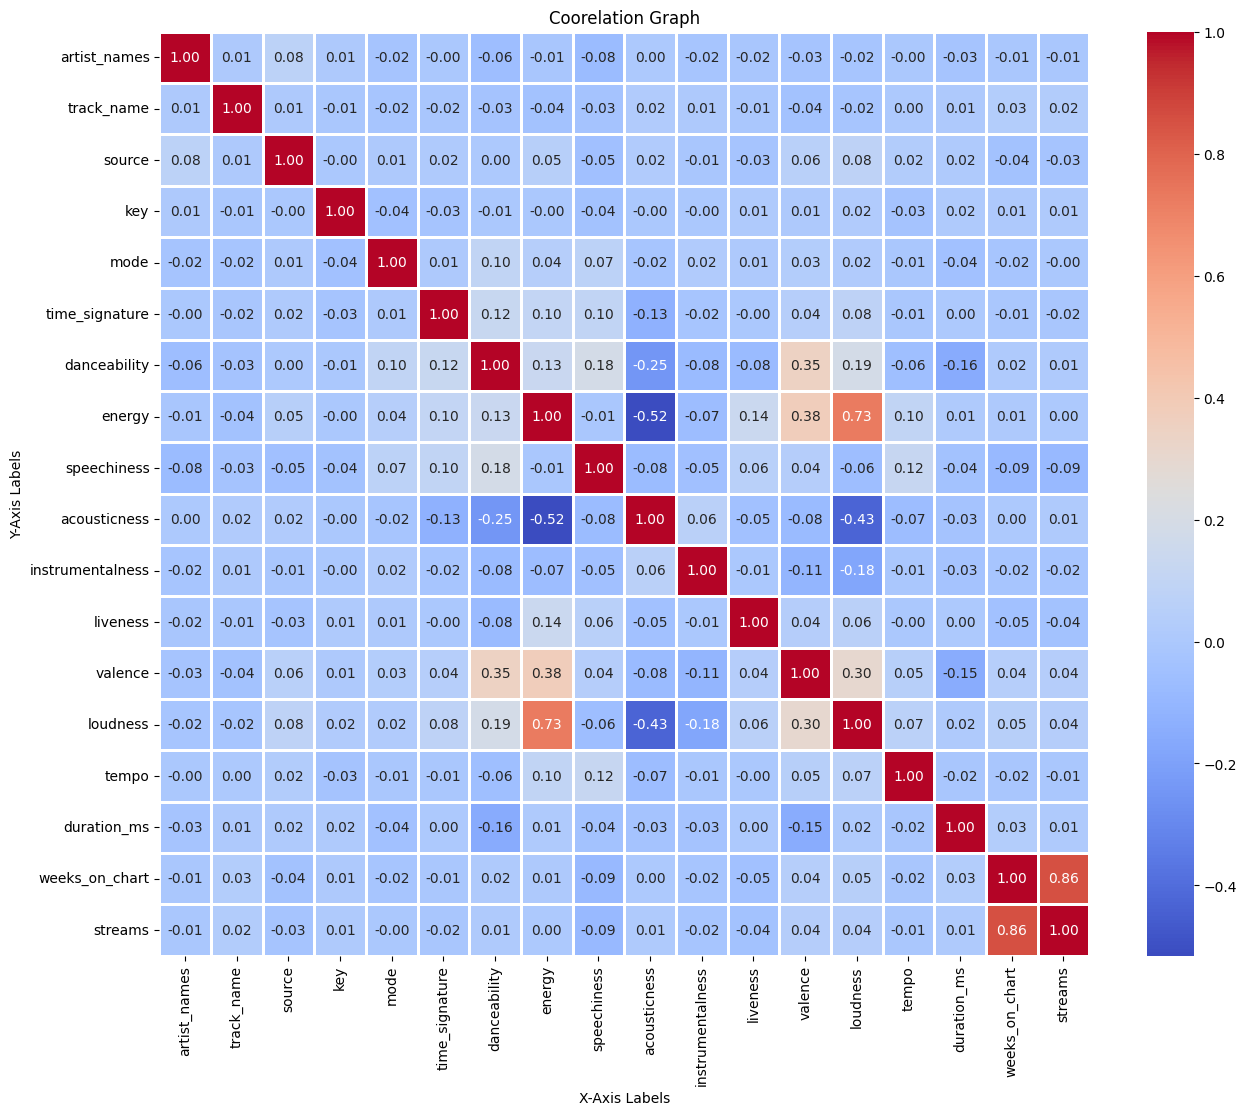

In [28]:
# Plotting the correlational heatmap
data = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=2, fmt=".2f", annot_kws={"size": 10})

# Adding labels and title
plt.xlabel("X-Axis Labels")
plt.ylabel("Y-Axis Labels")
plt.title("Coorelation Graph")

# Show the plot
plt.show()

Here we can observe that
- energy and loudness have a strong correlation
- energy and loudness have low correlation with acousticness. from this we can infer that acoustic songs tend to be less loud,energetic
- number of streams of a particular track has a strong correlation with weeks on chart but this inference is quite obvious

### Finding the feature importance with RandomForest
This will help us in determining the relevance or contribution of each feature in the model's prediction process. This is basically done to help in selecting what features to use to train a prediction model.


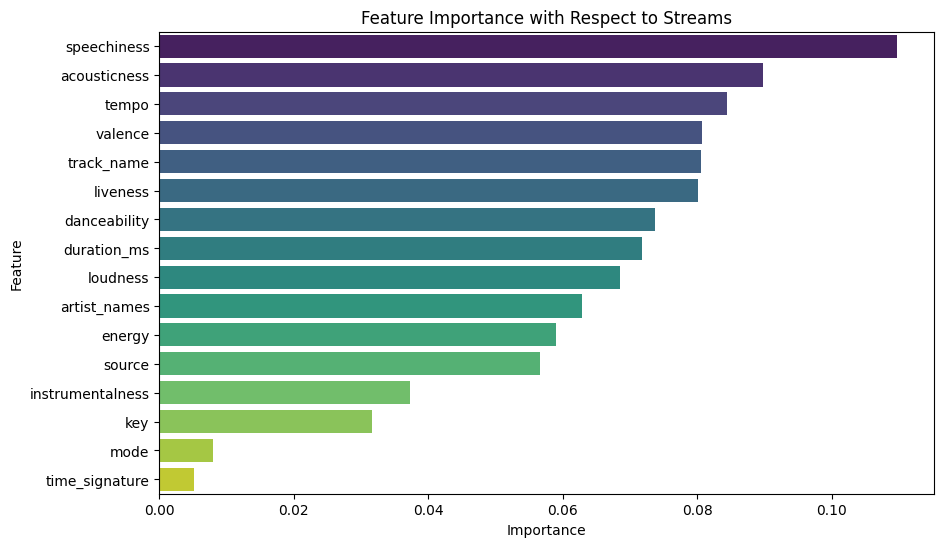

In [30]:
# first lets seperate the features from the target (which is streams in our case)
x = df.drop(columns=['streams', 'weeks_on_chart']) #removing weeks also as it has really strong corr with streams as we saw above so it might skew our plot
y = df['streams']
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf.fit(x, y)
# Get feature importances
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis', hue='Feature', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Respect to Streams')
plt.show()

Here we can observe that :
- The importance of each feature is in range 0.01-0.11 approximately
- This indicates that there is some diversity in how much each feature will contribute to the model.
- This suggests that the model will consider multiple features to make predictions, which is a good sign